In [1]:
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd
import os

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Manipulating Data and Model Building'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

'''Implementation of Transfer Learning'''
from tensorflow.keras.applications import MobileNetV2

'''Image generation and preprocessing'''
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Result and Performance Analysis'''
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

'''Ignoring Warnings'''
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

# Set your directory path
DIR = 'fish_dataset/fish_dataset'

# Get the classes by filtering out '.ipynb_checkpoints'
classes = [i for i in os.listdir(DIR) if '.' not in i and i != '.ipynb_checkpoints']

print(classes)

['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']


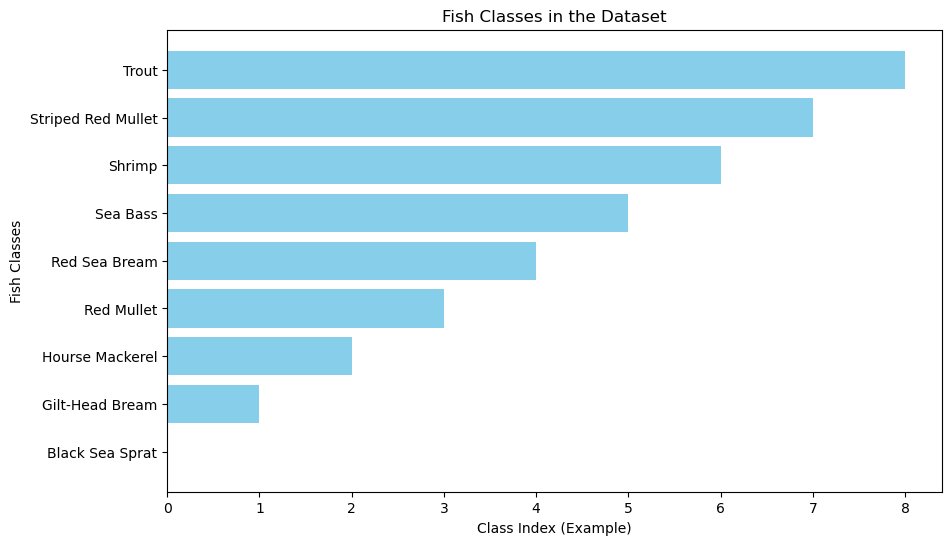

In [3]:
import os
import matplotlib.pyplot as plt

# Set your directory path
DIR = 'fish_dataset/fish_dataset'

# Get the classes by filtering out '.ipynb_checkpoints'
classes = [i for i in os.listdir(DIR) if '.' not in i and i != '.ipynb_checkpoints']

# Visualizing the classes as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(classes, range(len(classes)), color='skyblue')
plt.title('Fish Classes in the Dataset')
plt.xlabel('Class Index ')
plt.ylabel('Fish Classes')
plt.show()


In [5]:
'''Since the GT images are of no use to us for the analysis, we will be separating them out of our directory'''

# Create a dataframe with a column which consists of all the filepaths (without GT) and its respective label as the other column


# Initialize lists for labels and file paths
label = []
path = []

# Walk through the directory and collect paths and labels for images
for dirname, _, filenames in os.walk(DIR):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':  # Only consider .png files
            # Skip directories containing 'GT' and '.ipynb_checkpoints'
            if 'GT' not in dirname and '.ipynb_checkpoints' not in dirname:
                label.append(os.path.split(dirname)[-1])  # Append the directory name (label)
                path.append(os.path.join(dirname, filename))  # Append the full path of the image

# Create a DataFrame to store the paths and labels
df = pd.DataFrame(columns=['path', 'label'])
df['path'] = path
df['label'] = label

# Display the label count to verify the data
print(df['label'].value_counts())


label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64


In [6]:

df.head()

path            label
0  fish_dataset/fish_dataset\Black Sea Sprat\Blac...  Black Sea Sprat
1  fish_dataset/fish_dataset\Black Sea Sprat\Blac...  Black Sea Sprat
2  fish_dataset/fish_dataset\Black Sea Sprat\Blac...  Black Sea Sprat
3  fish_dataset/fish_dataset\Black Sea Sprat\Blac...  Black Sea Sprat
4  fish_dataset/fish_dataset\Black Sea Sprat\Blac...  Black Sea Sprat

In [7]:
df.path[0]

'fish_dataset/fish_dataset\\Black Sea Sprat\\Black Sea Sprat\\00001.png'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [9]:
df['label'].value_counts()

label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

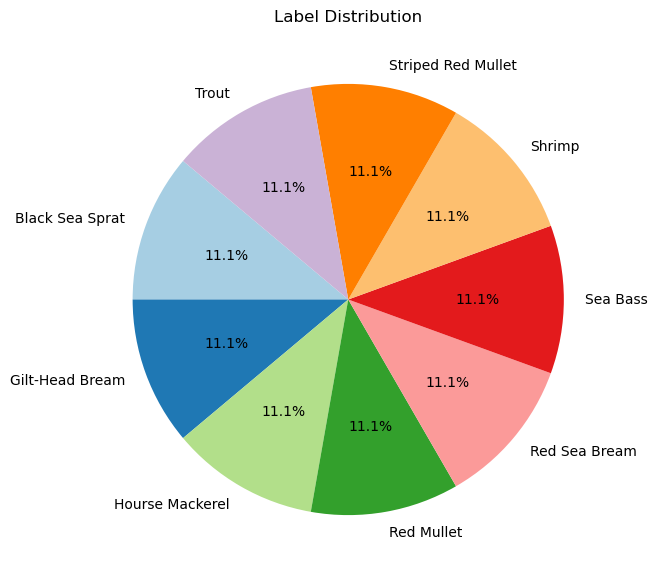

In [11]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Label Distribution')
plt.show()


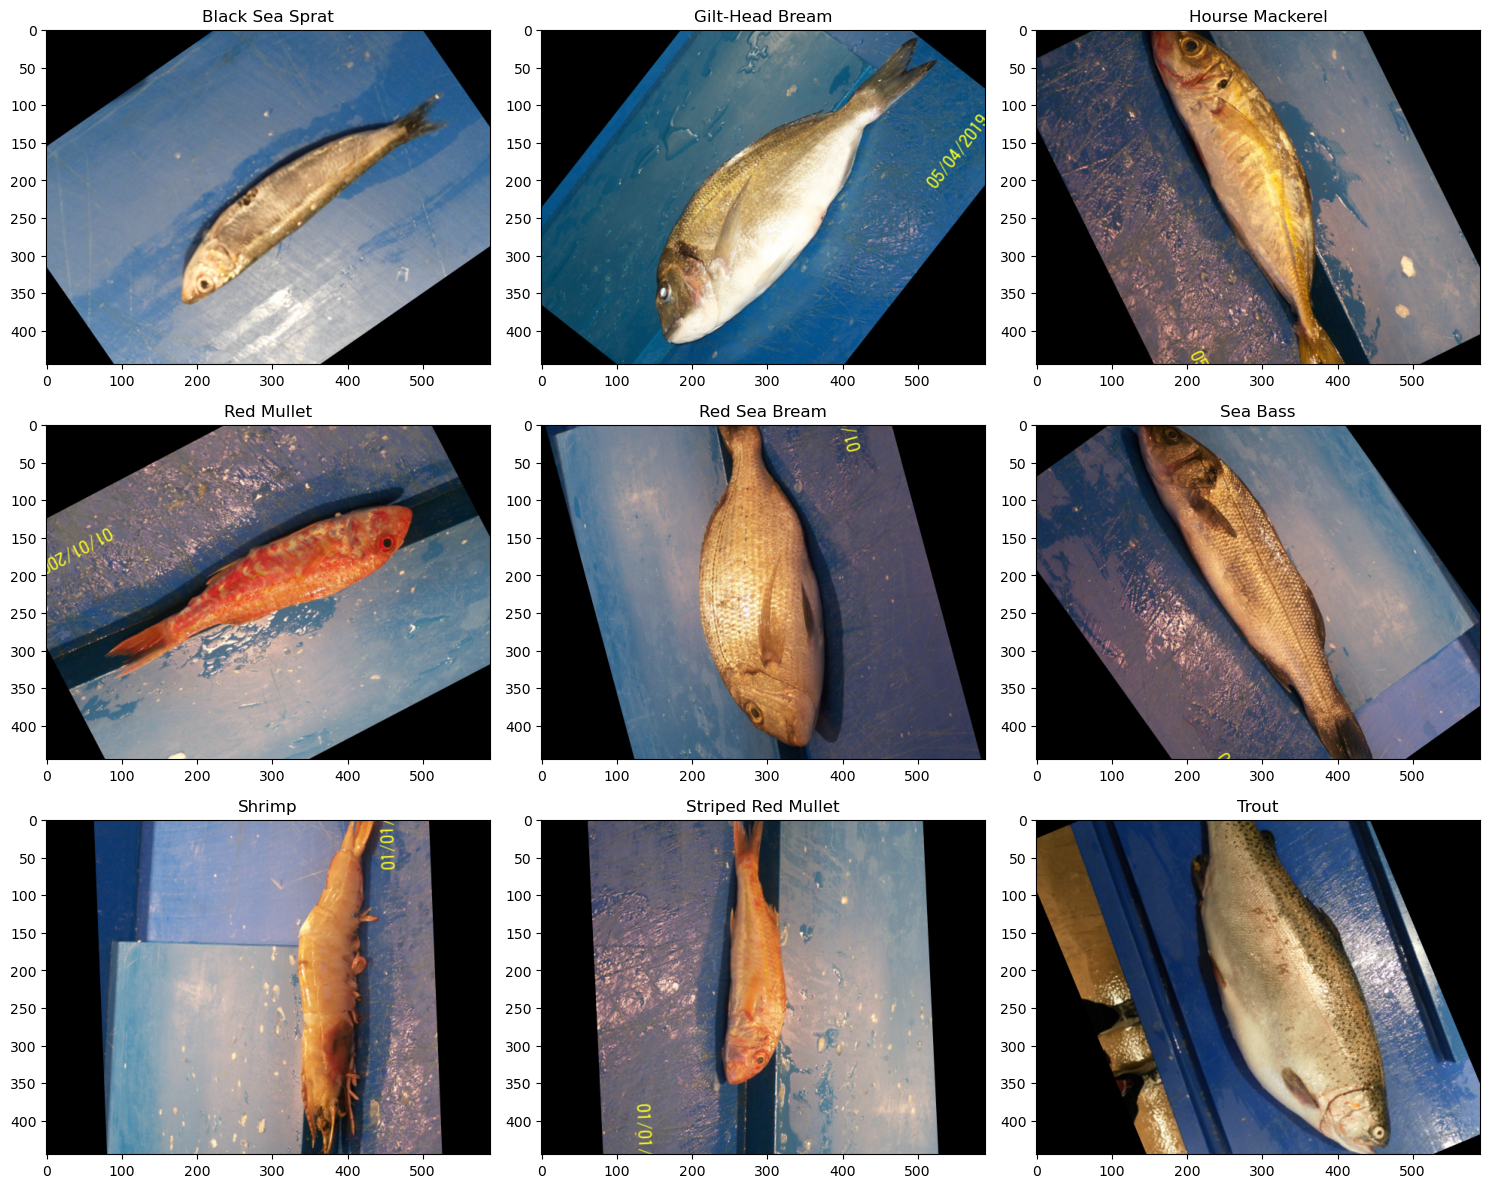

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df contains the data and 'label' is the column containing class labels
unique_labels = df['label'].unique()

# Determine the number of rows and columns for subplots based on the number of unique labels
rows = (len(unique_labels) // 3) + (len(unique_labels) % 3 > 0)  # Calculate number of rows
cols = 3  # Keep columns fixed at 3

# Create a new figure with dynamic size
plt.figure(figsize=(15, rows * 4))  # Adjust height based on the number of rows

# Plot each image for each label
for idx, unique_label in enumerate(unique_labels):
    plt.subplot(rows, cols, idx + 1)  # Adjust subplot index to match the dynamic grid size
    plt.imshow(plt.imread(df[df['label'] == unique_label].iloc[0, 0]))  # Display first image of the label
    plt.title(unique_label)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [13]:
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [14]:
#Checking the shaoe of the newly obtained data
print(train_df.shape)
print(test_df.shape)

(7200, 2)
(1800, 2)


In [17]:
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [18]:
#Using Keras Image Data Generator to preprocess our images with the model we wish to use
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [19]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [20]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)


{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


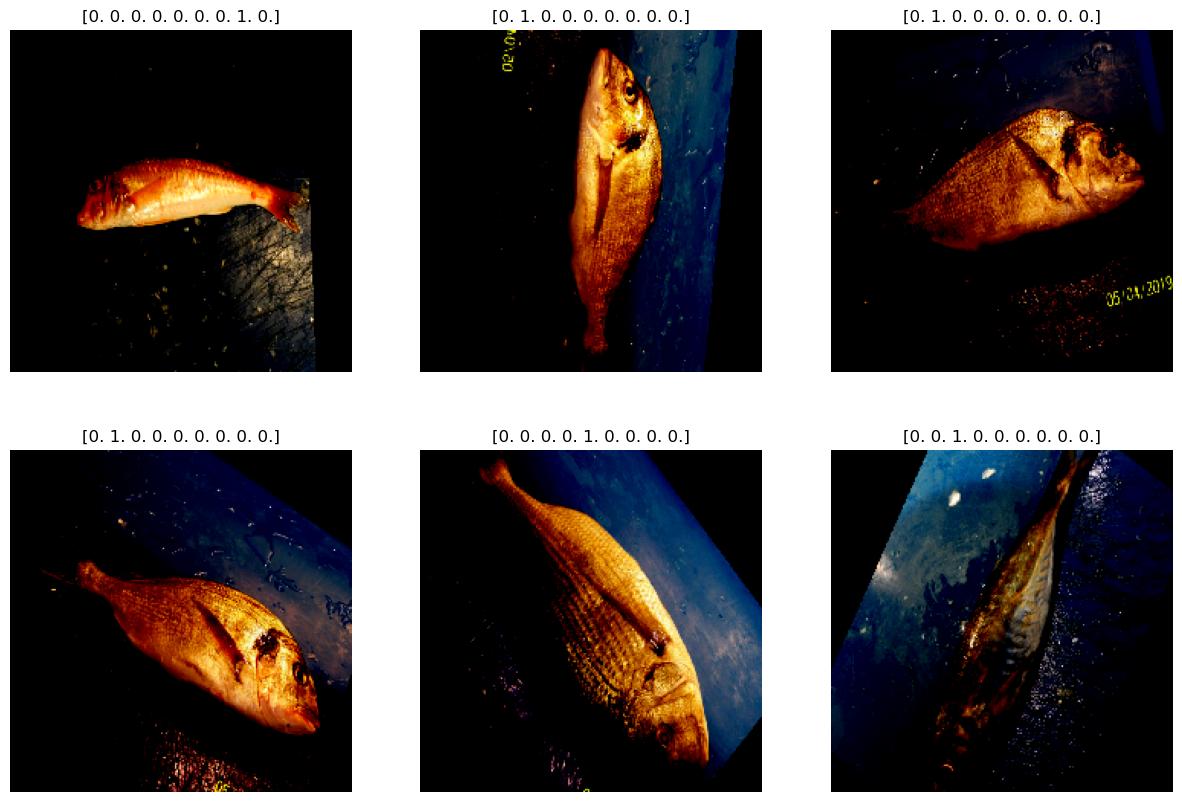

In [21]:
#Plotting images after pre-processing
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the layout for 6 images
ax = ax.ravel()  # Flatten the axes for easy iteration

# Loop through and display 6 images
for j in range(6):
    img, label = next(test_images)  # Get next image and label batch
    ax[j].imshow(img[0])  # Display the first image in the batch
    ax[j].set_title(label[0])  # Display the first label in the batch
    ax[j].axis('off')  # Hide axes

plt.show()


In [22]:
#Importing our pretrained model : MobileNetV2

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [37]:
import tensorflow as tf

# Define the model inputs and layers
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)  # Adjust '9' to the number of classes

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Save the model
model.save('model.keras')

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images,  # Training dataset
    validation_data=val_images,  # Validation dataset
    epochs=3 # Number of epochs
)
print(type(history))




Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,439,625 (9.31 MB)

 Trainable params: 181,641 (709.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 183s 996ms/step - accuracy: 0.8343 - loss: 0.5226 - val_accuracy: 0.9951 - val_loss: 0.0238
Epoch 2/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.9957 - loss: 0.0149 - val_accuracy: 0.9979 - val_loss: 0.0092
Epoch 3/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9972 - val_loss: 0.0098
<class 'keras.src.callbacks.history.History'>


In [38]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.00830
Test Accuracy: 99.78%


Test Loss: 0.00830
Test Accuracy: 99.78%


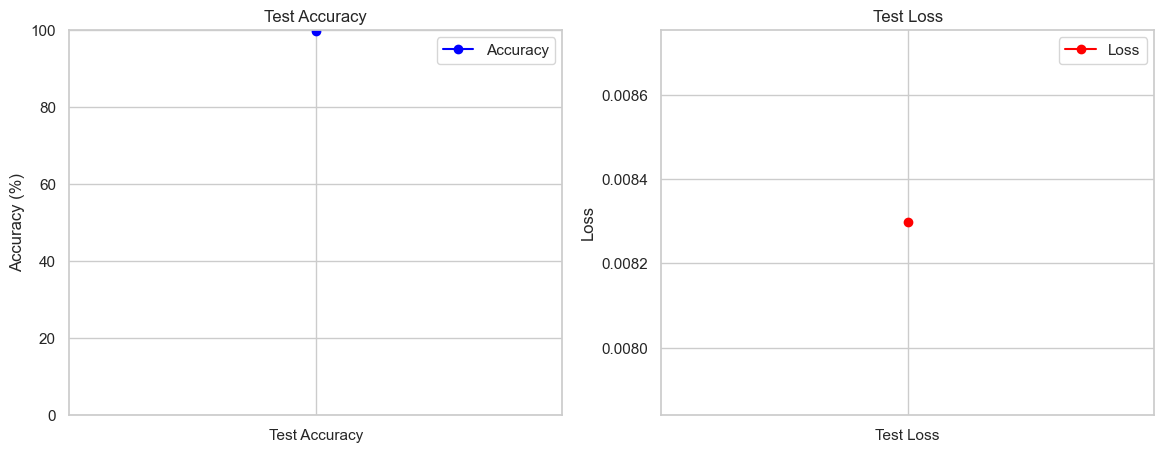

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Evaluate the model on the test set
results = model.evaluate(test_images, verbose=0)

# Print the results
test_loss, test_accuracy = results
print("Test Loss: {:.5f}".format(test_loss))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Plot Test Accuracy and Loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot test accuracy as a line plot
ax[0].plot(['Test Accuracy'], [test_accuracy * 100], marker='o', color='blue', label='Accuracy')
ax[0].set_title('Test Accuracy')
ax[0].set_ylim([0, 100])
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend()

# Plot test loss as a line plot
ax[1].plot(['Test Loss'], [test_loss], marker='o', color='red', label='Loss')
ax[1].set_title('Test Loss')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()


In [41]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 45s 771ms/step


In [42]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

In [43]:
# Visualize the pred_df
pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)

path               label  \
0  fish_dataset/fish_dataset\Striped Red Mullet\S...  Striped Red Mullet   
1  fish_dataset/fish_dataset\Gilt-Head Bream\Gilt...     Gilt-Head Bream   
2  fish_dataset/fish_dataset\Black Sea Sprat\Blac...     Black Sea Sprat   
3  fish_dataset/fish_dataset\Red Sea Bream\Red Se...       Red Sea Bream   
4    fish_dataset/fish_dataset\Trout\Trout\00413.png               Trout   
5    fish_dataset/fish_dataset\Trout\Trout\00731.png               Trout   
6  fish_dataset/fish_dataset\Sea Bass\Sea Bass\00...            Sea Bass   
7    fish_dataset/fish_dataset\Trout\Trout\00284.png               Trout   
8  fish_dataset/fish_dataset\Red Mullet\Red Mulle...          Red Mullet   
9  fish_dataset/fish_dataset\Red Sea Bream\Red Se...       Red Sea Bream   

                 pred  
0  Striped Red Mullet  
1     Gilt-Head Bream  
2     Black Sea Sprat  
3       Red Sea Bream  
4               Trout  
5               Trout  
6            Sea Bass  
7               Trout  
8          Red Mullet  
9       Red Sea Bream

In [44]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]


path     label  \
62    fish_dataset/fish_dataset\Sea Bass\Sea Bass\00...  Sea Bass   
924   fish_dataset/fish_dataset\Sea Bass\Sea Bass\00...  Sea Bass   
1380  fish_dataset/fish_dataset\Sea Bass\Sea Bass\00...  Sea Bass   
1393  fish_dataset/fish_dataset\Sea Bass\Sea Bass\00...  Sea Bass   

                    pred  
62    Striped Red Mullet  
924   Striped Red Mullet  
1380       Red Sea Bream  
1393     Gilt-Head Bream

In [46]:
pred_df.path[1602]

'fish_dataset/fish_dataset\\Striped Red Mullet\\Striped Red Mullet\\00773.png'

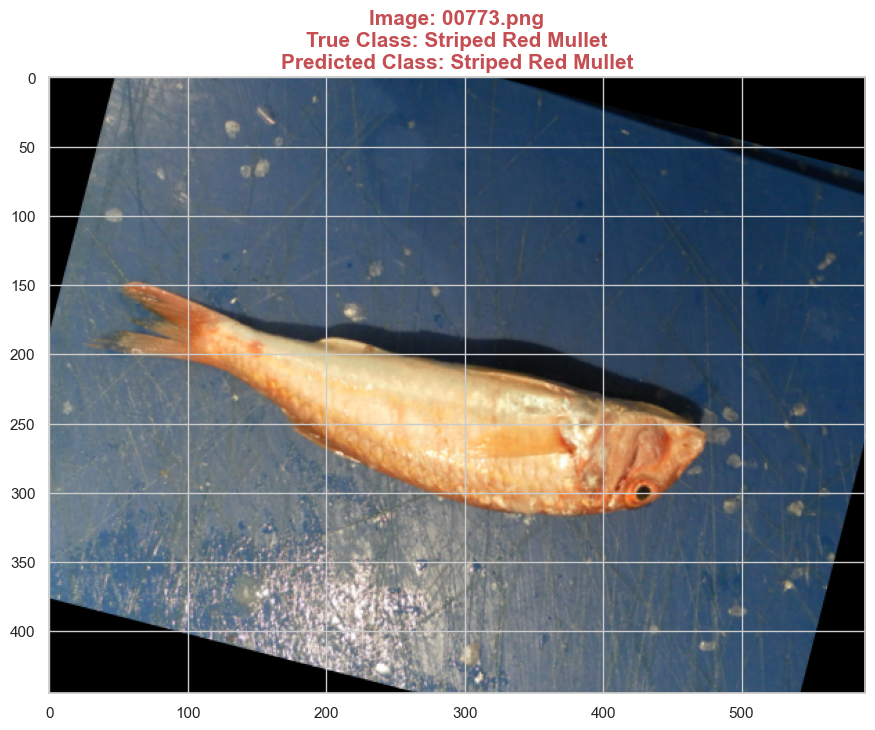

In [47]:
# Display the image
plt.figure(figsize=(15, 8))
plt.imshow(plt.imread(pred_df.path[1602]))

# Extract true class, image name, and predicted class
# Splitting the path by "\\" to account for Windows path structure
path_parts = pred_df.path[1602].split('\\')
true_class = path_parts[1]  # Assuming the fish name is the second part of the path
image_name = path_parts[-1]  # The last part is the image file name
predicted_class = pred_df.pred[1602]  # Extract predicted class

# Set title with corrected labels
plt.title(
    f'Image: {image_name}\nTrue Class: {true_class}\nPredicted Class: {predicted_class}',
    color='r',
    weight='bold',
    fontsize=15
)

# Show the plot
plt.show()


In [48]:
title1 = pred_df.path[1602].split('/')[-2]  # True class (folder name)
title2 = pred_df.path[1602].split('/')[-1]
title2

'fish_dataset\\Striped Red Mullet\\Striped Red Mullet\\00773.png'

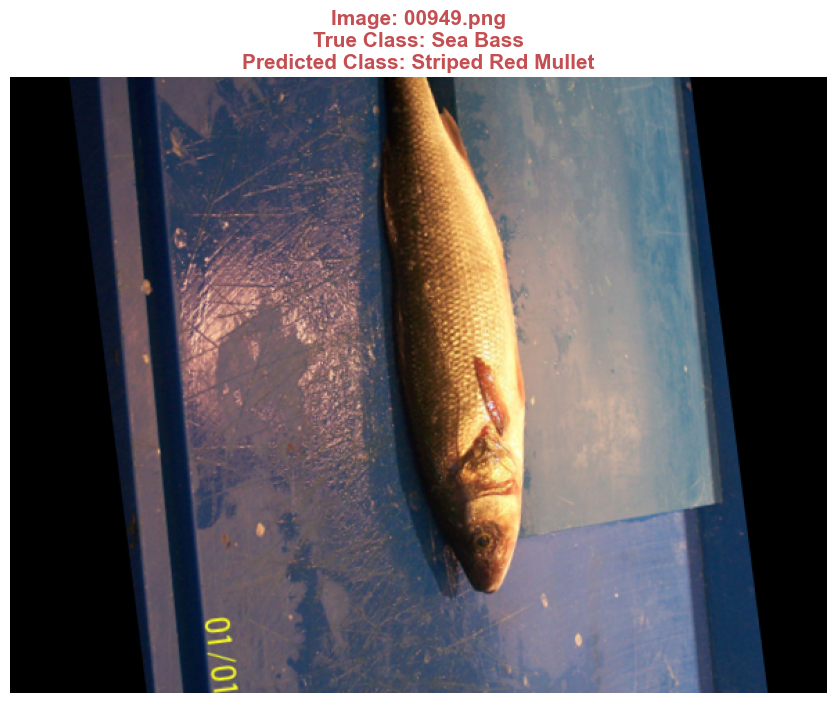

In [49]:
# Filter for incorrect predictions
incorrect_predictions = pred_df[pred_df['label'] != pred_df['pred']]

# Check if there are any incorrect predictions
if not incorrect_predictions.empty:
    # Pick the first incorrect prediction
    sample_idx = incorrect_predictions.index[0]
    image_path = incorrect_predictions.loc[sample_idx, 'path']
    true_class = incorrect_predictions.loc[sample_idx, 'label']  # True class
    predicted_class = incorrect_predictions.loc[sample_idx, 'pred']  # Predicted class

    # Display the image
    plt.figure(figsize=(15, 8))
    plt.imshow(plt.imread(image_path))

    # Extract image name from the path
    image_name = image_path.split('\\')[-1]

    # Set title with corrected labels
    plt.title(
        f'Image: {image_name}\nTrue Class: {true_class}\nPredicted Class: {predicted_class}',
        color='r',
        weight='bold',
        fontsize=15
    )

    # Show the plot
    plt.axis('off')
    plt.show()
else:
    print("No incorrect predictions found!")


Accuracy Score: 0.9977777777777778


<Axes: >

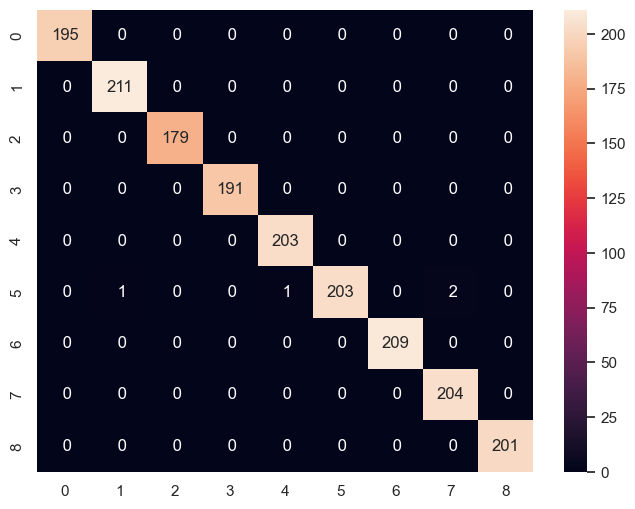

In [54]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

In [50]:
#Generating the Classification Report for in-depth analysis
print(classification_report(pred_df['label'],pred_df['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       195
   Gilt-Head Bream       1.00      1.00      1.00       211
   Hourse Mackerel       1.00      1.00      1.00       179
        Red Mullet       1.00      1.00      1.00       191
     Red Sea Bream       1.00      1.00      1.00       203
          Sea Bass       1.00      0.98      0.99       207
            Shrimp       1.00      1.00      1.00       209
Striped Red Mullet       0.99      1.00      1.00       204
             Trout       1.00      1.00      1.00       201

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800



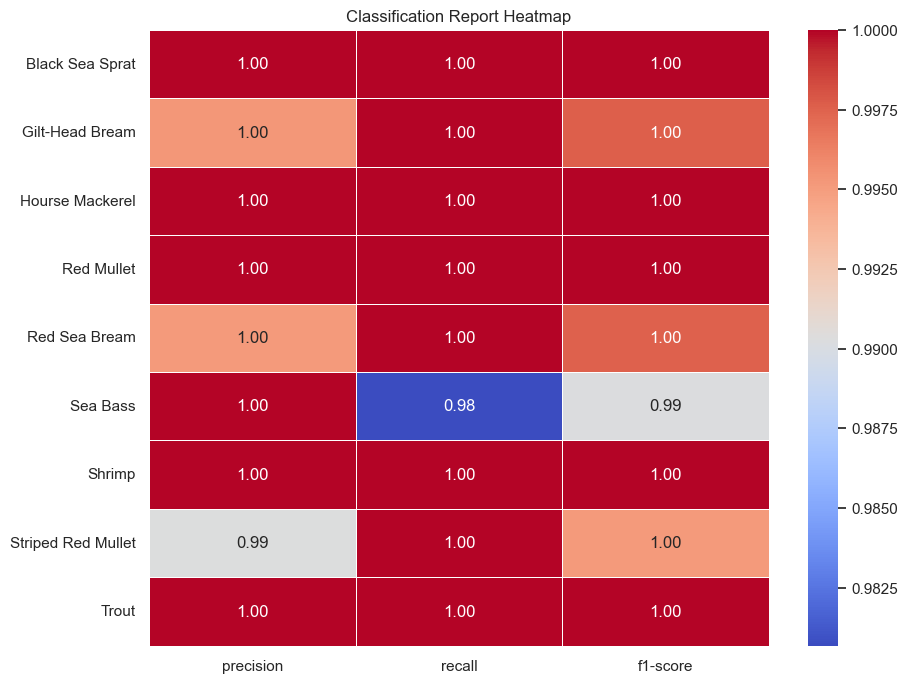

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
report = classification_report(pred_df['label'], pred_df['pred'], output_dict=True)

# Convert the dictionary into a pandas DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()



In [51]:
pred_df[pred_df['label']!=pred_df['pred']]

path     label  \
62    fish_dataset/fish_dataset\Sea Bass\Sea Bass\00...  Sea Bass   
924   fish_dataset/fish_dataset\Sea Bass\Sea Bass\00...  Sea Bass   
1380  fish_dataset/fish_dataset\Sea Bass\Sea Bass\00...  Sea Bass   
1393  fish_dataset/fish_dataset\Sea Bass\Sea Bass\00...  Sea Bass   

                    pred  
62    Striped Red Mullet  
924   Striped Red Mullet  
1380       Red Sea Bream  
1393     Gilt-Head Bream

In [52]:
pred_df.path[1607]


'fish_dataset/fish_dataset\\Shrimp\\Shrimp\\00449.png'

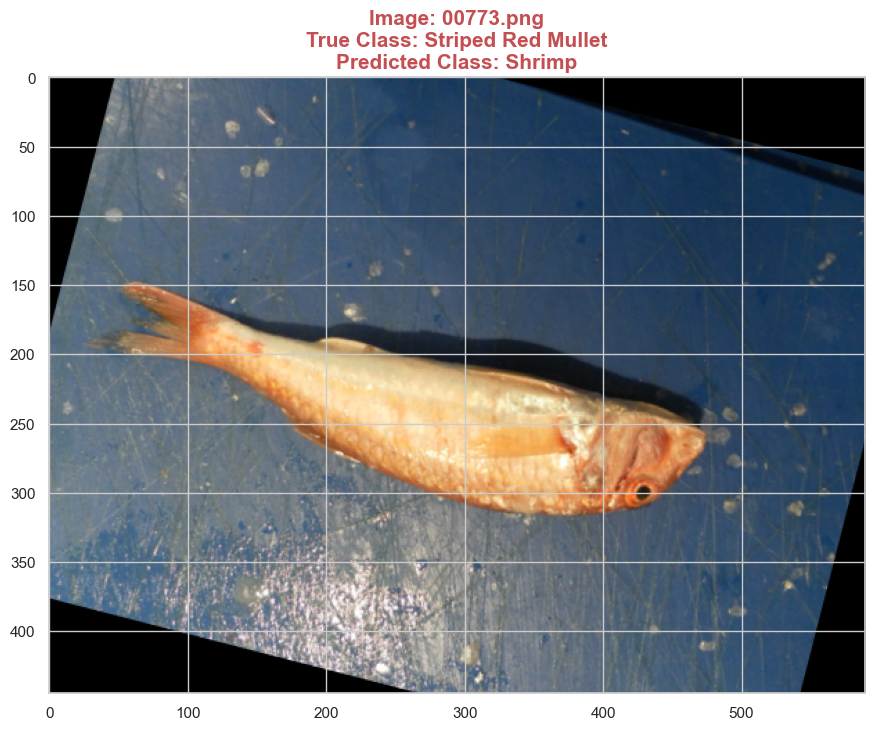

In [53]:

# Display the image
plt.figure(figsize=(15, 8))
plt.imshow(plt.imread(pred_df.path[1602]))

# Extract true class, image name, and predicted class
# Splitting the path by "\\" to account for Windows path structure
path_parts = pred_df.path[1602].split('\\')
true_class = path_parts[1]  # Assuming the fish name is the second part of the path
image_name = path_parts[-1]  # The last part is the image file name
predicted_class = pred_df.pred[1607]  # Extract predicted class

# Set title with corrected labels
plt.title(
    f'Image: {image_name}\nTrue Class: {true_class}\nPredicted Class: {predicted_class}',
    color='r',
    weight='bold',
    fontsize=15
)

# Show the plot
plt.show()

